In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm

In [2]:
input_data = pd.read_csv(r'C:/Users/George/Desktop/Magistratyra/Project/Concantinate/result.csv', index_col='Unnamed: 0')
input_data.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
input_data = input_data.sort_index() # sort in

In [3]:
data = input_data.AQI[:-20]

In [4]:
%%time
best_model = sm.tsa.statespace.SARIMAX(data, order=(4, 1, 0), 
                                        seasonal_order=(3, 1, 1, 12)).fit(disp=-1)
print(best_model.summary())

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                  AQI   No. Observations:                 2902
Model:             SARIMAX(4, 1, 0)x(3, 1, [1], 12)   Log Likelihood              -12571.351
Date:                              Tue, 20 Dec 2022   AIC                          25160.702
Time:                                      17:15:53   BIC                          25214.420
Sample:                                  01-01-2013   HQIC                         25180.061
                                       - 12-11-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2147      0.014    -14.914      0.000      -0.243      -0.186
ar.L2         -0.22

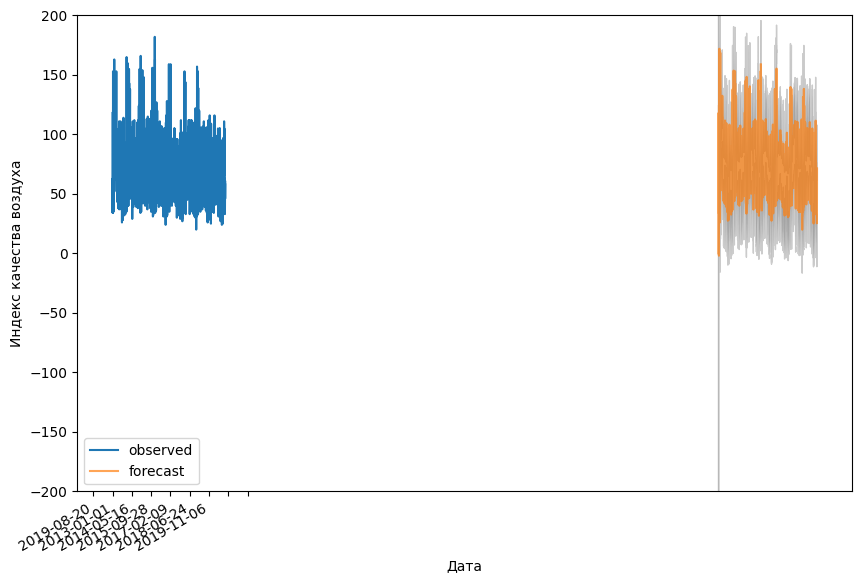

In [5]:
pred = best_model.get_prediction(start='2013-01-01', end='2020-01-01', dynamic=False)
pred_ci = pred.conf_int()

fx = input_data['AQI']['2013-01-01':].plot(label='observed', figsize=(10, 7),ylim=[-200,200])
pred.predicted_mean.plot(ax=fx, label='forecast', alpha=.7)
fx.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
fx.set_xlabel('Дата')
fx.set_ylabel('Индекс качества воздуха')
plt.legend()
plt.show()